# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [1]:
# imports and load data
import pandas as pd
df = pd.read_csv("store_data.csv")
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   week    200 non-null    object
 1   storeA  200 non-null    int64 
 2   storeB  200 non-null    int64 
 3   storeC  200 non-null    int64 
 4   storeD  200 non-null    int64 
 5   storeE  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [3]:
df["week"] = pd.to_datetime(df["week"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   week    200 non-null    datetime64[ns]
 1   storeA  200 non-null    int64         
 2   storeB  200 non-null    int64         
 3   storeC  200 non-null    int64         
 4   storeD  200 non-null    int64         
 5   storeE  200 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 9.5 KB


## separate the date column into day, month, year columns
- datetime objects in pandas have attributes that can be accessed using the `dt` accessor.
    - `df['date'].dt.year` returns the year of the datetime
    - `df['date'].dt.month` returns the month of the datetime and `df['date'].dt.month_name()` returns the month name
    - `df['date'].dt.day` returns the day of the datetime, `df['date'].dt.day_name()` returns the day name

In [12]:
df["year"] = df["week"].dt.year

In [14]:
print(df["week"].dt.month_name())
df["month"] = df["week"].dt.month_name()

0           May
1           May
2           May
3           May
4          June
         ...   
195     January
196    February
197    February
198    February
199    February
Name: week, Length: 200, dtype: object


In [17]:
df["week"].dt.day

0       4
1      11
2      18
3      25
4       1
       ..
195    28
196     4
197    11
198    18
199    25
Name: week, Length: 200, dtype: int32

In [20]:
df["week"].dt.day_name()

0      Sunday
1      Sunday
2      Sunday
3      Sunday
4      Sunday
        ...  
195    Sunday
196    Sunday
197    Sunday
198    Sunday
199    Sunday
Name: week, Length: 200, dtype: object

In [18]:
df["day"] = df["week"].dt.day

In [21]:
df.head()

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
0,2014-05-04,2643,8257,3893,6231,1294,2014,May,4
1,2014-05-11,6444,5736,5634,7092,2907,2014,May,11
2,2014-05-18,9646,2552,4253,5447,4736,2014,May,18
3,2014-05-25,5960,10740,8264,6063,949,2014,May,25
4,2014-06-01,7412,7374,3208,3985,3023,2014,June,1


Which store has the highest total sales for the final month of data?

In [22]:
df["year"].value_counts()

year
2017    53
2015    52
2016    52
2014    35
2018     8
Name: count, dtype: int64

In [23]:
final_year = df[df['year'] == 2018]
final_year

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
192,2018-01-07,8978,11312,4158,5019,3842,2018,January,7
193,2018-01-14,6963,4014,4215,7153,3097,2018,January,14
194,2018-01-21,5553,3971,3761,6255,3071,2018,January,21
195,2018-01-28,282,6351,7759,5558,1028,2018,January,28
196,2018-02-04,4853,6503,4187,5956,1458,2018,February,4
197,2018-02-11,9202,3677,4540,6186,243,2018,February,11
198,2018-02-18,3512,7511,4151,5596,3501,2018,February,18
199,2018-02-25,7560,6904,3569,5045,2585,2018,February,25


In [24]:
final_year["month"].value_counts()

month
January     4
February    4
Name: count, dtype: int64

In [25]:
final_year[final_year["month"] == "February"]

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
196,2018-02-04,4853,6503,4187,5956,1458,2018,February,4
197,2018-02-11,9202,3677,4540,6186,243,2018,February,11
198,2018-02-18,3512,7511,4151,5596,3501,2018,February,18
199,2018-02-25,7560,6904,3569,5045,2585,2018,February,25


In [34]:
final_year[final_year["month"] == "February"].loc[:,"storeA":"storeE"].sum()

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

In [41]:
final_year[final_year["month"] == "February"].iloc[:,1:6].sum()

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

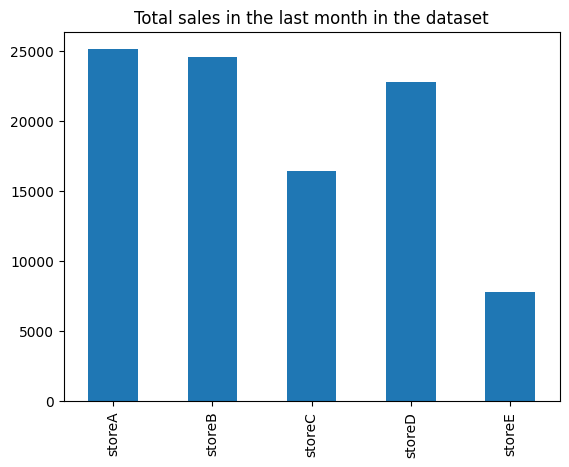

In [44]:
final_year[final_year["month"] == "February"].loc[:,"storeA":"storeE"].sum().plot(kind="bar",title="Total sales in the last month in the dataset");

- store A has the highest total sales for the final month of data

Which store makes the most sales on average?

In [48]:
df.loc[:,"storeA":"storeE"].mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

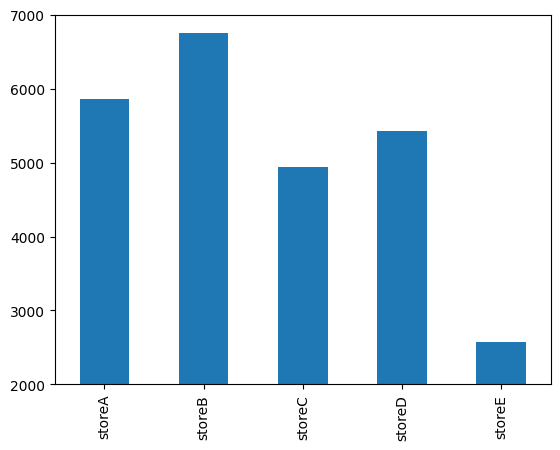

In [50]:
df.loc[:,"storeA":"storeE"].mean().plot(kind='bar',ylim=[2000,7000]);

- store B makes the most sales on average

Which store sells the most during the week of March 13th, 2016?

In [51]:
df[ (df["year"] == 2016) &  (df["month"] == "March") & (df["day"] == 13)  ]


,week,storeA,storeB,storeC,storeD,storeE,year,month,day
97,2016-03-13,2054,1390,5112,5513,2536,2016,March,13


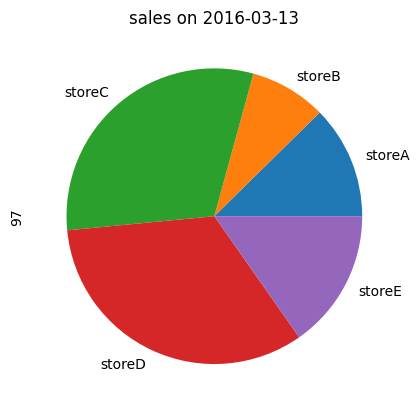

In [52]:
march_13 = df[ (df["year"] == 2016) &  (df["month"] == "March") & (df["day"] == 13)].iloc[0]
march_13.iloc[1:6].plot(kind='pie',title="sales on 2016-03-13");

- store D sells the most on 13th March 2016

In what week does store C make its worst sales?

In [53]:
df["storeC"].min()

927

In [54]:
df[df["storeC"] == df["storeC"].min()]

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
9,2014-07-06,8567,3228,927,3277,168,2014,July,6


- on 6th july 2014, store C makes its worst sales

Which store has the most sales in the latest 3-month period?
- the last 3 months are december 2017, january 2018, and february 2018

In [55]:
df[ (df['year'] == 2018) | (df["year"] == 2017) & (df['month'] == "December")]

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
187,2017-12-03,5179,3850,6121,6778,113,2017,December,3
188,2017-12-10,9348,5624,5446,5448,227,2017,December,10
189,2017-12-17,5310,8647,5680,7049,3578,2017,December,17
190,2017-12-24,8976,9503,6240,3882,2890,2017,December,24
191,2017-12-31,11875,1527,6711,5265,1701,2017,December,31
192,2018-01-07,8978,11312,4158,5019,3842,2018,January,7
193,2018-01-14,6963,4014,4215,7153,3097,2018,January,14
194,2018-01-21,5553,3971,3761,6255,3071,2018,January,21
195,2018-01-28,282,6351,7759,5558,1028,2018,January,28
196,2018-02-04,4853,6503,4187,5956,1458,2018,February,4


In [61]:
df[ (df['year'] == 2018) | (df["year"] == 2017) & (df['month'] == "December")].loc[:,"storeA":"storeE"].sum()

storeA    87591
storeB    79394
storeC    66538
storeD    75190
storeE    27334
dtype: int64

<Axes: title={'center': 'Sales of the Last 3 months'}>

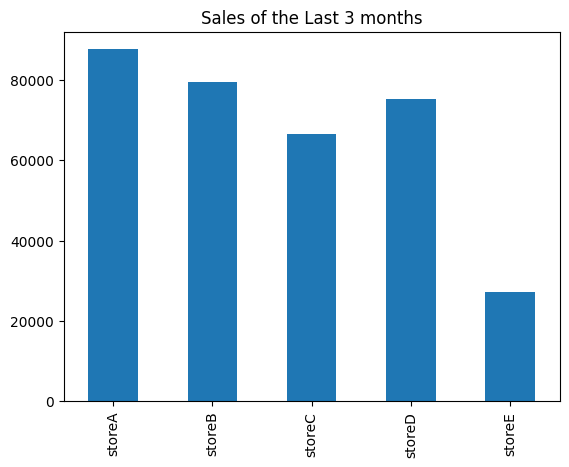

In [64]:
df[ (df['year'] == 2018) | (df["year"] == 2017) & (df['month'] == "December")].loc[:,"storeA":"storeE"].sum().plot(kind="bar",title="Sales of the Last 3 months",x="Store name")

- store A has the most sales in the latest 3-month period